In [8]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\sharath\anaconda3\lib\site-packages (0.0)


In [9]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Read the CSV and Perform Basic Data Cleaning

# Select your features (columns)

In [11]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [12]:
num_of_rows = df.count()
num_of_rows

koi_disposition      6991
koi_fpflag_nt        6991
koi_fpflag_ss        6991
koi_fpflag_co        6991
koi_fpflag_ec        6991
koi_period           6991
koi_period_err1      6991
koi_period_err2      6991
koi_time0bk          6991
koi_time0bk_err1     6991
koi_time0bk_err2     6991
koi_impact           6991
koi_impact_err1      6991
koi_impact_err2      6991
koi_duration         6991
koi_duration_err1    6991
koi_duration_err2    6991
koi_depth            6991
koi_depth_err1       6991
koi_depth_err2       6991
koi_prad             6991
koi_prad_err1        6991
koi_prad_err2        6991
koi_teq              6991
koi_insol            6991
koi_insol_err1       6991
koi_insol_err2       6991
koi_model_snr        6991
koi_tce_plnt_num     6991
koi_steff            6991
koi_steff_err1       6991
koi_steff_err2       6991
koi_slogg            6991
koi_slogg_err1       6991
koi_slogg_err2       6991
koi_srad             6991
koi_srad_err1        6991
koi_srad_err2        6991
ra          

In [13]:
# Set features. This will also be used as your x values.
selected_features = df[['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_co','koi_fpflag_ss', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad']]
selected_features

,koi_disposition,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ss,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad
0,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83
1,FALSE POSITIVE,0,0,1,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60
2,FALSE POSITIVE,0,0,1,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46
3,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75
4,CONFIRMED,0,0,0,0,4.134435,172.979370,0.762,3.14020,686.0,2.77
...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,132.016100,0.765,4.80600,87.7,1.11
6987,FALSE POSITIVE,0,1,1,0,0.527699,131.705093,1.252,3.22210,1579.2,29.35
6988,CANDIDATE,0,0,0,0,1.739849,133.001270,0.043,3.11400,48.5,0.72
6989,FALSE POSITIVE,0,1,0,0,0.681402,132.181750,0.147,0.86500,103.6,1.07


# Create a Train Test Split

Use `koi_disposition` for the y values

In [14]:
X = selected_features[['koi_impact', 'koi_duration','koi_depth']]
Y = selected_features["koi_disposition"].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
print(X.shape, Y.shape)

(6991, 3) (6991, 1)


In [15]:
X.head()

,koi_impact,koi_duration,koi_depth
0,0.586,4.50700,874.8
1,0.969,1.78220,10829.0
2,1.276,2.40641,8079.2
3,0.701,1.65450,603.3
4,0.762,3.14020,686.0


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
X_array = X.to_numpy()
X_array

array([[5.86000e-01, 4.50700e+00, 8.74800e+02],
       [9.69000e-01, 1.78220e+00, 1.08290e+04],
       [1.27600e+00, 2.40641e+00, 8.07920e+03],
       ...,
       [4.30000e-02, 3.11400e+00, 4.85000e+01],
       [1.47000e-01, 8.65000e-01, 1.03600e+02],
       [1.34000e-01, 3.07800e+00, 7.67000e+01]])

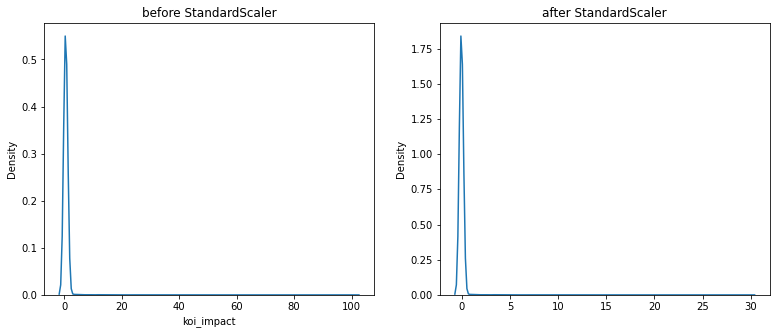

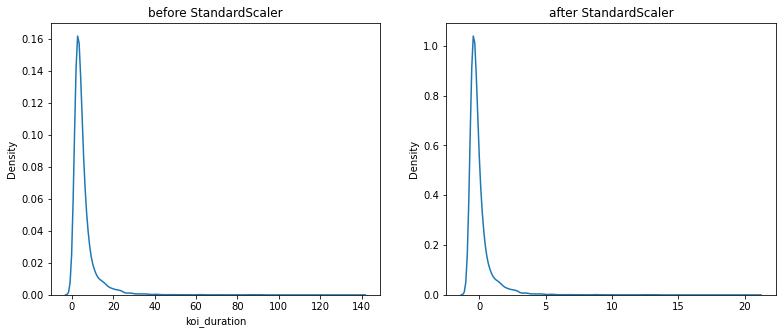

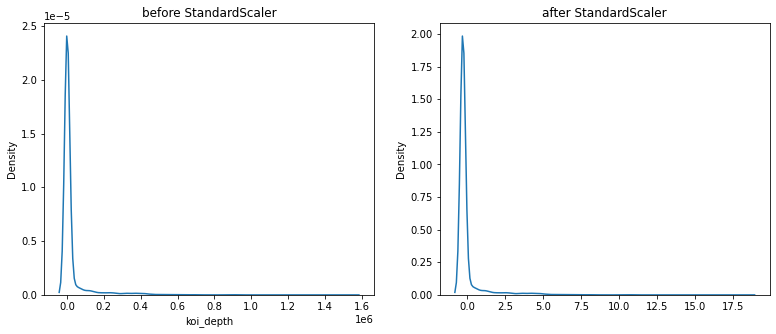

In [17]:
# Scale your data
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC

def standard_scaleplots(dfs, var_s, z):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(dfs[var_s])
    plt.title('before ' + str(z).split('(')[0])
    
    plt.subplot(122)
    p_1 = z.fit_transform(dfs[[var_s]]).flatten()
    sns.kdeplot(p_1)
    plt.title('after ' + str(z).split('(')[0])
    
Standard_Scale_graph = []

for cols in X_train.columns:
    Standard_Scale_graph = standard_scaleplots(X, cols, StandardScaler())
    
Standard_Scale_graph
    

# Train the Model



In [18]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

model = SVC(kernel='linear')
model.fit(X_train_scaled, np.ravel(Y_train))

Y_pred = model.predict(X_test_scaled)
Y_pred

array(['FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE'], dtype=object)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 6],
              'gamma': [0.0001, 0.001, 0.01]}

grid2 = GridSearchCV(estimator = SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             verbose=3)

grid2.fit(X_train, np.ravel(Y_train))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [19]:
# Train the model with GridSearch
model

SVC(kernel='linear')

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [20]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Sharath_ML_StandardScaler.sav'
joblib.dump(Standard_Scale_graph, filename)

['Sharath_ML_StandardScaler.sav']